In [1]:
#https://www.exfinsis.com/tutorials/python-programming-language/macd-stock-technical-indicator-with-python/

In [4]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib as ta 
from itertools import compress
import seaborn as sns

In [5]:
symbol ="TSLA"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-05-01",end="2021-02-09")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-04-30,18382.0,171.037994,173.964005,152.699997,156.376007
2020-05-01,18383.0,151.000000,154.554001,136.608002,140.264008
2020-05-04,18386.0,140.199997,152.399994,139.600006,152.238007
2020-05-05,18387.0,157.957993,159.783997,152.436005,153.641998
2020-05-06,18388.0,155.300003,157.960007,152.222000,156.516006
...,...,...,...,...,...
2021-02-02,18660.0,844.679993,880.500000,842.200012,872.789978
2021-02-03,18661.0,877.020020,878.080017,853.059998,854.690002
2021-02-04,18662.0,855.000000,856.500000,833.419983,849.989990


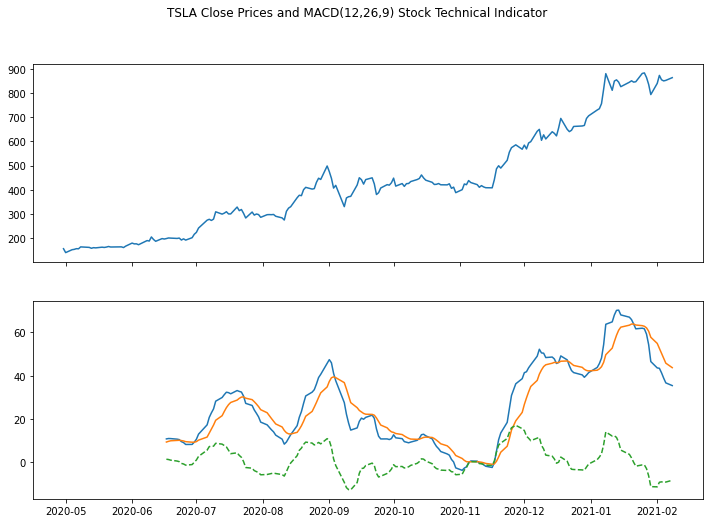

In [15]:
df[0]['macd'], df[0]['macdsig'], df[0]['macdhist'] = ta.MACD(np.asarray(df[0]['Close']),
                                                      fastperiod=12, slowperiod=26, signalperiod=9)

fig1, ax = plt.subplots(2, sharex=True,figsize=(12,8))
ax[0].plot(df[0]['Close'])
#ax[0].legend(loc='upper left')
ax[1].plot(df[0]['macd'])
ax[1].plot(df[0]['macdsig'])
ax[1].plot(df[0]['macdhist'], linestyle='--')
#ax[1].legend(loc='upper left')
plt.suptitle('TSLA Close Prices and MACD(12,26,9) Stock Technical Indicator')
plt.show()